    price  square_footage  bedrooms  bathrooms
0  300000            1500         3          2
1  450000            2500         4          3
2  500000            3000         4          3
3  350000            2000         3          2
4  600000            3500         5          4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           10 non-null     int64
 1   square_footage  10 non-null     int64
 2   bedrooms        10 non-null     int64
 3   bathrooms       10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes
None
              price  square_footage   bedrooms  bathrooms
count  1.000000e+01       10.000000  10.000000  10.000000
mean   8.400000e+05     4200.000000   5.400000   4.400000
std    5.566766e+05     2175.622516   2.065591   2.065591
min    3.000000e+05     1500.000000   3.000000   2.000000
25%    4.625000e+05  

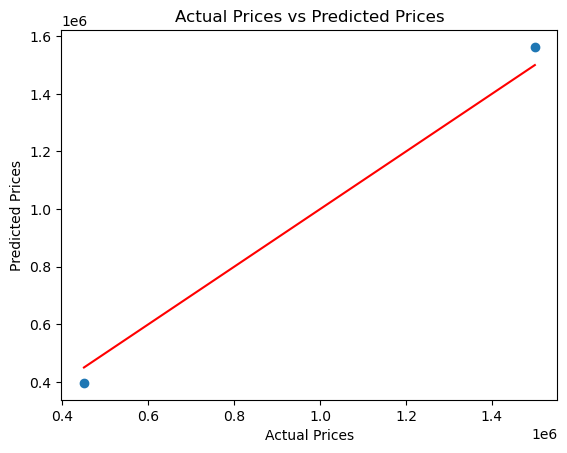

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('house_prices.csv')

print(data.head())
print(data.info())
print(data.describe())


print(data.isnull().sum())
data = data.dropna()


X = data[['square_footage', 'bedrooms', 'bathrooms']]
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}, Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}, Testing R2: {r2_test}')

plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()
